In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from optparse import OptionParser
from math import ceil, log

%matplotlib inline

In [2]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

<h3>1. Multiplicación de matrices</h3>

In [3]:
def multiplication(A, B, acct):
    C = np.zeros(((len(A), len(B))), dtype=np.int); acct.count()
    for i in range(0, len(A)):
        acct.count()
        for j in range(0, A[i].size):
            acct.count()
            for k in range(0, len(B)):
                acct.count()
                C[i,j] += A[i,k] * B[k,j]; acct.count()
    return C

<h3>2. Multiplicacion de matrices método Divide-Conquer</h3>

In [4]:
def multiplyMatrixDQ(A, B, acct):
    try:
        assert A.shape == B.shape
        zero = False; acct.count()
        if(len(A)%2 != 0 != len(B)%2):
            acct.count()
            A = np.append(A, np.zeros((1, len(A)), dtype=np.int), axis=0); acct.count()
            A = np.append(A, np.zeros((len(A), 1), dtype=np.int), axis=1); acct.count()
            B = np.append(B, np.zeros((1, len(B)), dtype=np.int), axis=0); acct.count()
            B = np.append(B, np.zeros((len(B), 1), dtype=np.int), axis=1); acct.count()
            zero = True; acct.count()

        if(len(A) == 2): 
            acct.count()
            return multiplication(A, B, acct)
        else:
            acct.count()
            fq = (multiplyMatrixDQ((A[:len(A)/2, :A[len(A)/2].size/2]), (B[:len(B)/2, :B[len(B)/2].size/2]), acct) + (multiplyMatrixDQ((A[:len(A)/2, A[len(A)/2].size/2:]), (B[len(B)/2:, 0:B[len(B)/2].size/2]), acct))); acct.count()
            sq = (multiplyMatrixDQ((A[:len(A)/2, :A[len(A)/2].size/2]), (B[:len(B)/2, B[len(B)/2].size/2:]), acct) + (multiplyMatrixDQ((A[:len(A)/2, A[len(A)/2].size/2:]), (B[len(B)/2:, B[len(B)/2].size/2:]), acct))); acct.count()
            fq_sq = np.concatenate((fq, sq), axis=1); acct.count()
            tq = (multiplyMatrixDQ((A[len(A)/2:, 0:A[len(A)/2].size/2]), (B[:len(B)/2, :B[len(B)/2].size/2]), acct) + (multiplyMatrixDQ((A[len(A)/2:, A[len(A)/2].size/2:]), (B[len(B)/2:, 0:B[len(B)/2].size/2]), acct))); acct.count()
            qq = (multiplyMatrixDQ((A[len(A)/2:, 0:A[len(A)/2].size/2]), (B[:len(B)/2, B[len(B)/2].size/2:]), acct) + (multiplyMatrixDQ((A[len(A)/2:, A[len(A)/2].size/2:]), (B[len(B)/2:, B[len(B)/2].size/2:]), acct))); acct.count()
            tq_qq = np.concatenate((tq, qq), axis=1); acct.count()
            C = np.concatenate((fq_sq, tq_qq), axis=0); acct.count()
            if(zero):
                acct.count()
                C = np.delete(C, len(C)-1, 0); acct.count()
                C = np.delete(C, len(C), 1); acct.count()
                
            return C
    except  AssertionError:
        print "Error ambas matrices deben ser cuadradas y del mismo tamaño"
        sys.exit()

<h3>3. Multiplicacion de matrices Algoritmo de Strassen</h3>

In [5]:
def add(A, B, acct):
    n = len(A); acct.count()
    C = np.zeros(shape=(n,n), dtype=np.int); acct.count()
    for i in xrange(0, n):
        acct.count()
        for j in xrange(0, n):
            acct.count()
            C[i,j] = A[i,j] + B[i,j]; acct.count()
    return C

In [6]:
def subtract(A, B, acct):
    n = len(A); acct.count()
    C = np.zeros(shape=(n,n), dtype=np.int); acct.count()
    for i in xrange(0, n):
        acct.count()
        for j in xrange(0, n):
            acct.count()
            C[i,j] = A[i,j] - B[i,j]; acct.count()
    return C

In [7]:
def strassenR(A, B, acct):
    n = len(A); acct.count()

    if n <= 2:
        acct.count()
        return multiplication(A, B, acct)
    else:
        acct.count()
        a11 = A[:n/2, :A[n/2].size/2]; acct.count()     # Arriba-izq
        a12 = A[:n/2, A[n/2].size/2:]; acct.count()     # Arriba-Der
        a21 = A[n/2:, 0:A[n/2].size/2]; acct.count()    # Abajo-Izq
        a22 = A[n/2:, A[n/2].size/2:]; acct.count()     # Abajo-Der

        b11 = B[:n/2, :B[n/2].size/2]; acct.count()     # Arriba-izq
        b12 = B[:n/2, B[n/2].size/2:]; acct.count()     # Arriba-Der
        b21 = B[n/2:, 0:B[n/2].size/2]; acct.count()    # Abajo-Izq
        b22 = B[n/2:, B[n/2].size/2:]; acct.count()     # Abajo-Der

        # Calculando p1 to p7:
        aResult = add(a11, a22, acct); acct.count()
        bResult = add(b11, b22, acct); acct.count()
        p1 = strassenR(aResult, bResult, acct); acct.count() # p1 = (a11+a22) * (b11+b22)

        aResult = add(a21, a22, acct); acct.count()      # a21 + a22
        p2 = strassenR(aResult, b11, acct); acct.count()  # p2 = (a21+a22) * (b11)

        bResult = subtract(b12, b22, acct); acct.count() # b12 - b22
        p3 = strassenR(a11, bResult, acct); acct.count()  # p3 = (a11) * (b12 - b22)

        bResult = subtract(b21, b11, acct); acct.count() # b21 - b11
        p4 =strassenR(a22, bResult, acct); acct.count()   # p4 = (a22) * (b21 - b11)

        aResult = add(a11, a12, acct); acct.count()      # a11 + a12
        p5 = strassenR(aResult, b22, acct); acct.count()  # p5 = (a11+a12) * (b22)   

        aResult = subtract(a21, a11, acct); acct.count() # a21 - a11
        bResult = add(b11, b12, acct); acct.count()      # b11 + b12
        p6 = strassenR(aResult, bResult, acct); acct.count() # p6 = (a21-a11) * (b11+b12)

        aResult = subtract(a12, a22, acct); acct.count() # a12 - a22
        bResult = add(b21, b22, acct); acct.count()      # b21 + b22
        p7 = strassenR(aResult, bResult, acct); acct.count() # p7 = (a12-a22) * (b21+b22)

        # calculando c21, c21, c11 e c22:
        c12 = add(p3, p5, acct); acct.count() # c12 = p3 + p5
        c21 = add(p2, p4, acct); acct.count()  # c21 = p2 + p4

        aResult = add(p1, p4, acct); acct.count() # p1 + p4
        bResult = add(aResult, p7, acct); acct.count() # p1 + p4 + p7
        c11 = subtract(bResult, p5, acct); acct.count() # c11 = p1 + p4 - p5 + p7

        aResult = add(p1, p3, acct); acct.count() # p1 + p3
        bResult = add(aResult, p6, acct); acct.count() # p1 + p3 + p6
        c22 = subtract(bResult, p2, acct); acct.count() # c22 = p1 + p3 - p2 + p6

        # Agupacion de resultados:
        C = np.zeros(shape=(n,n), dtype=np.int); acct.count()
        
        C[:n/2, :A[n/2].size/2] = c11[:n/2, :B[n/2].size/2]; acct.count()
        C[:n/2, A[n/2].size/2:] = c12[:n/2, :A[n/2].size/2]; acct.count()
        C[n/2:, 0:A[n/2].size/2] = c21[:n/2, :A[n/2].size/2]; acct.count()
        C[n/2:, A[n/2].size/2:] = c22[:n/2, :A[n/2].size/2]; acct.count()
        return C

In [8]:
def strassen(A, B, acct):
    try:
        assert A.shape == B.shape
        nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2))); acct.count()
        n = len(A); acct.count()
        m = nextPowerOfTwo(n); acct.count()
        APrep = np.zeros(shape=(m,m), dtype=np.int);
        BPrep = np.zeros(shape=(m,m), dtype=np.int);
        for i in xrange(n):
            acct.count()
            for j in xrange(n):
                acct.count()
                APrep[i,j] = A[i,j]; acct.count()
                BPrep[i,j] = B[i,j]; acct.count()
        CPrep = strassenR(APrep, BPrep, acct); acct.count()
        C = np.zeros(shape=(n,n), dtype=np.int); acct.count()
        for i in xrange(n):
            acct.count()
            for j in xrange(n):
                acct.count()
                C[i,j] = CPrep[i,j]; acct.count()
                
        return C
    except  AssertionError:
        print "Error ambas matrices deben ser cuadradas y del mismo tamaño"
        sys.exit()

In [9]:
def exper_analysis(n):
    steps1 = []
    steps2 = []
    steps3 = []
    timeP1 = []
    timeP2 = []
    timeP3 = []
    acct1 = Counter()
    acct2 = Counter()
    acct3 = Counter()
    for i in range(2, n):
        A1 = np.random.randint(100, size=(i, i))
        B1 = np.random.randint(100, size=(i, i))
        A2 = A1
        B2 = B1
        A3 = A1
        B3 = B1
        acct1.reset()
        acct2.reset()
        acct3.reset()
        
        tic1 = time.clock()
        multiplication(A1, B1, acct1)
        toc1 = time.clock()
        
        tic2 = time.clock()
        multiplyMatrixDQ(A2, B2, acct2)
        toc2 = time.clock()
        
        tic3 = time.clock()
        strassen(A3, B3, acct3)
        toc3 = time.clock()
        
        timeP1.append(toc1 - tic1)
        timeP2.append(toc2 - tic2)
        timeP3.append(toc3 - tic3)
        
        steps1.append(acct1.steps)
        steps2.append(acct2.steps)
        steps3.append(acct3.steps)
    
    steps = np.concatenate((np.asmatrix(steps1), np.asmatrix(steps2), np.asmatrix(steps3)), axis=0)
    timeP = np.concatenate((np.asmatrix(timeP1), np.asmatrix(timeP2), np.asmatrix(timeP3)), axis=0)
    
    results = [steps, timeP]
    return results

<h3>3. Grafica de cantidad de Operaciones y Tiempos Respectivamente</h3>

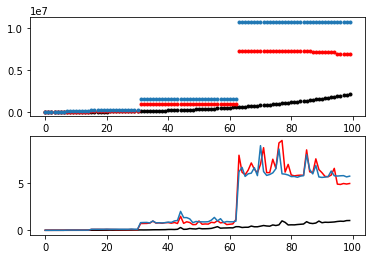

In [10]:
plt.figure(1)
x = np.arange(100)
res = exper_analysis(102)
s = np.matrix(res[0])           #-> Arreglo con la cantidad de procesos realizados para cada algoritmo (Negro-Tradiciona, Rojo-Divide and Conquer, Azul-Strassen)
t = np.matrix(res[1])           #-> Arreglo de tiempos de ejecucion en cada algoritmo (Negro-Tradiciona, Rojo-Divide and Conquer, Azul-Strassen)
plt.subplot(211)
plt.plot(x, s[0,:].T, 'k.', s[1,:].T , 'r.', s[2,:].T, '.')
plt.subplot(212)
plt.plot(x, t[0,:].T, 'k', t[1,:].T , 'r', t[2,:].T, '')
plt.show()